<a href="https://colab.research.google.com/github/karimelerian/DataMining/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Khaled Cherif

ID: 55-3198

Tutorial: 6

---

Name: karim elerian

ID: 55-25593

Tutorial: 06

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

- used df.info function to give a detailed summary of the whole dataset including to output the names of all columns in the DataFrame,The number of non-missing (non-null) values in each column, The data type of each column and the number of rows and columns in the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB


used df.describe() function to get summary statistics for the numerical columns in the DataFrame. It's useful for gaining a quick overview of the distribution and range of your numerical data.

In [ ]:
df.describe()

,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


used df.isnull().sum() to make sure there are no null values in any columns


In [ ]:
df.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


used df.dtypes to make sure data types are correct for data cleaning and to understand data

In [ ]:
df.dtypes

,0
year,int64
make,object
model,object
trim,object
body,object
transmission,object
vin,object
state,object
condition,float64
odometer,object


used df.shape to know number of columns and rows in my data frame

In [ ]:
df.shape

(46578, 15)

to know if there are any duplicated rows

In [ ]:
df.duplicated().sum()

0

used df['body'].unique() to know all the different car body types so i can reduces them to the asked body parts only

In [ ]:
print(df['body'].unique())

['sedan' 'SUV' 'Sedan' 'E-Series Van' 'Crew Cab' 'suv' 'G Sedan' 'Wagon'
 'Regular Cab' 'Double Cab' 'wagon' 'Coupe' 'Minivan' 'SuperCrew' 'coupe'
 'convertible' 'Extended Cab' 'Hatchback' 'van' 'hatchback' 'Van'
 'Convertible' 'SuperCab' 'g sedan' 'king cab' 'G Convertible' 'King Cab'
 'extended cab' 'quad cab' 'supercab' 'Beetle Convertible' 'minivan'
 'G Coupe' 'Quad Cab' 'crew cab' 'supercrew' 'CrewMax Cab' 'double cab'
 'g coupe' 'Club Cab' 'Access Cab' 'Genesis Coupe' 'e-series van'
 'G37 Convertible' 'Cab Plus 4' 'crewmax cab' 'genesis coupe'
 'promaster cargo van' 'access cab' 'Mega Cab' 'Koup' 'regular cab'
 'mega cab' 'Elantra Coupe' 'Q60 Convertible' 'regular-cab'
 'Promaster Cargo Van' 'Xtracab' 'CTS Coupe' 'CTS Wagon'
 'GranTurismo Convertible' 'beetle convertible' 'TSX Sport Wagon'
 'g convertible' 'tsx sport wagon' 'CTS-V Coupe' 'Q60 Coupe'
 'granturismo convertible' 'cts coupe' 'Transit Van' 'xtracab']


to check categorical inconsistencies in other columns

In [ ]:
print(df['make'].unique())
print(df['transmission'].unique())
print(df['interior'].unique())
print(df['color'].unique())
print(df['state'].unique())


['Hyundai' 'Toyota' 'Lexus' 'BMW' 'Ford' 'Kia' 'Chevrolet' 'Cadillac'
 'Mercedes-Benz' 'Jeep' 'Infiniti' 'Lincoln' 'Mazda' 'Chrysler' 'GMC'
 'Honda' 'Dodge' 'Audi' 'Nissan' 'Buick' 'MINI' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Volkswagen' 'Subaru' 'Porsche' 'Isuzu' 'Saturn' 'Pontiac'
 'Scion' 'Acura' 'Ram' 'Land Rover' 'Suzuki' 'Mercury' 'HUMMER' 'Saab'
 'Maserati' 'FIAT' 'Geo' 'smart' 'Oldsmobile' 'Fisker' 'Bentley'
 'Plymouth' 'Ferrari' 'Aston Martin']
['automatic' 'manual']
['gray' '—' 'black' 'beige' 'tan' 'red' 'blue' 'brown' 'off-white'
 'silver' 'orange' 'purple' 'white' 'gold' 'burgundy' 'green' 'yellow']
['black' 'gray' 'silver' 'white' 'blue' 'burgundy' 'beige' 'gold' 'green'
 'red' 'purple' '—' 'yellow' 'brown' 'turquoise' 'orange' 'off-white'
 'charcoal' 'pink' 'lime']
['ma' 'fl' 'wa' 'co' 'ca' 'il' 'nv' 'mo' 'tx' 'ne' 'md' 'nj' 'la' 'ny'
 'nc' 'ut' 'va' 'ga' 'tn' 'oh' 'ms' 'pa' 'or' 'mi' 'wi' 'az' 'pr' 'mn'
 'in' 'hi' 'sc' 'ok' 'nm' 'al']


here we wantt to know the which column has the lowest number of unique values for more interpretation. This is a step we did to start assessing which column might have the highest correlation with sellingprice because columns with fewer unique values often provide simpler or more interpretable relationships with the target variable

In [ ]:
unique_values = df.apply(lambda x: x.unique())
unique_values

,0
year,"[2013, 2014, 2012, 2002, 2007, 2008, 2011, 201..."
make,"[Hyundai, Toyota, Lexus, BMW, Ford, Kia, Chevr..."
model,"[Sonata, 4Runner, IS 250, X5, E-Series Van, Op..."
trim,"[GLS, SR5, Base, 4.4i, E-250, LX, LS, E350, Fr..."
body,"[sedan, SUV, Sedan, E-Series Van, Crew Cab, su..."
transmission,"[automatic, manual]"
vin,"[5npeb4acxdh702805, jtezu5jr2e5064567, jthbf5c..."
state,"[ma, fl, wa, co, ca, il, nv, mo, tx, ne, md, n..."
condition,"[3.9, 4.9, 4.1, 1.9, 4.6, 3.6, 1.7, 5.0, 4.4, ..."
odometer,"[50404.0mi, 17846.0mi, 21122.0mi, 145303.0mi, ..."


to know how many unique values per column

In [ ]:
df.nunique()

,0
year,26
make,48
model,648
trim,1097
body,71
transmission,2
vin,46578
state,34
condition,41
odometer,39460


to know the number of missing values in interior and color

In [ ]:
underscore_count = df[df['interior'] == '—'].shape[0]
print(str(underscore_count) +"interior")
underscore_count = df[df['color'] == '—'].shape[0]
print(str(underscore_count)  + "color")

988interior
2246color


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
#Extract the numerical part of sellingprice
df['sellingprice'] = df['sellingprice'].str.extract('(\d+)', expand=False).str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB


turned saledate into datetime instead of object for future analytics

In [ ]:
# Change datatype of "SaleDate" to datetime for consistency
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)

<ipython-input-3-76f98e367b0a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], utc=True)


turned numerical columns(odometer, sellingprice) loaded in as object to floats for future analytics by first removing mi from odometer and $ from sellingprice then turning them into float

In [ ]:
#Replace wrong color values with mode color
mode = df['color'].mode().values[0]
df['color'].replace(['—', '— '], mode, inplace=True)

<ipython-input-4-d1d84ee830e1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color'].replace(['—', '— '], mode, inplace=True)


In [ ]:
#Replace wrong interior values with mode interior
mode2 = df['interior'].mode().values[0]
df['interior'].replace(['—', '— '], mode2, inplace=True)


<ipython-input-5-916b13581913>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['interior'].replace(['—', '— '], mode2, inplace=True)


In [ ]:
#Change Data type of color to string
df['color'] = df['color'].astype(str)
df['interior'] = df['interior'].astype(str)

In [ ]:
#Remove "mi" suffix from odometer
df['odometer'] = df['odometer'].str.extract('(\d+\.\d+|\d+)',expand=False)

In [ ]:
#Change datatype of selling price to float
df['sellingprice'] = df['sellingprice'].astype(float)

In [ ]:
#Change datatype of odometer to float
df['odometer'] = df['odometer'].astype(float)

In [ ]:
#Change datatype of condition to float
df['condition'] = df['condition'].astype(float)

# displays the first 5 rows of the DataFrame df after the transformations.
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,10900.0,2015-06-01 19:30:00+00:00
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,29900.0,2015-02-17 23:15:00+00:00
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,24200.0,2015-01-19 17:30:00+00:00
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3200.0,2015-03-03 23:10:00+00:00
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22100.0,2015-02-17 22:45:00+00:00


In [ ]:
#here I wanted to check if there are any missing value in body column before i can do the reduction on the column( now I know there is no value missing, so I shouldnt make a case for handling missing value)
missing_body_count = df['body'].isnull().sum()
print(f"Number of missing values in 'body' column: {missing_body_count}")

Number of missing values in 'body' column: 0


In [ ]:
# Reducing types of body values
#converts the body type to lowercase to ensure that the search for keywords is case-insensitive


def categorize_body(body_type):
    lower_body = body_type.lower()
    if 'sedan' in lower_body:
        return 'Sedan'
    elif 'coupe' in lower_body:
        return 'Coupe'
    elif 'convertible' in lower_body:
        return 'Convertible'
    elif 'hatchback' in lower_body:
        return 'Hatchback'
    elif 'suv' in lower_body:
        return 'SUV'
    elif 'van' in lower_body:
        return 'Minivan'
    elif 'wagon' in lower_body:
        return 'Wagon'
    elif 'supercrew' in lower_body:
        return 'Pickup Truck'
    elif 'pickup' in lower_body:
        return 'Pickup Truck'
    else:
        return 'Other'

df['body'] = df['body'].apply(lambda x: categorize_body(x))

print(df)

       year      make         model         trim     body transmission  \
0      2013   Hyundai        Sonata          GLS    Sedan    automatic   
1      2014    Toyota       4Runner          SR5      SUV    automatic   
2      2012     Lexus        IS 250         Base    Sedan    automatic   
3      2002       BMW            X5         4.4i      SUV    automatic   
4      2014      Ford  E-Series Van        E-250  Minivan    automatic   
...     ...       ...           ...          ...      ...          ...   
46573  2013      Ford          Edge           SE      SUV    automatic   
46574  2012  Infiniti       G Sedan  G37 Journey    Sedan    automatic   
46575  2013       BMW      3 Series         328i    Sedan    automatic   
46576  2013    Toyota         Camry           LE    Sedan    automatic   
46577  2013       Kia           Rio           LX    Sedan    automatic   

                     vin state  condition  odometer   color interior  \
0      5npeb4acxdh702805    ma        3

In [ ]:
# Ensuring Correct Data Types
df.dtypes


,0
year,int64
make,object
model,object
trim,object
body,object
transmission,object
vin,object
state,object
condition,float64
odometer,float64


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

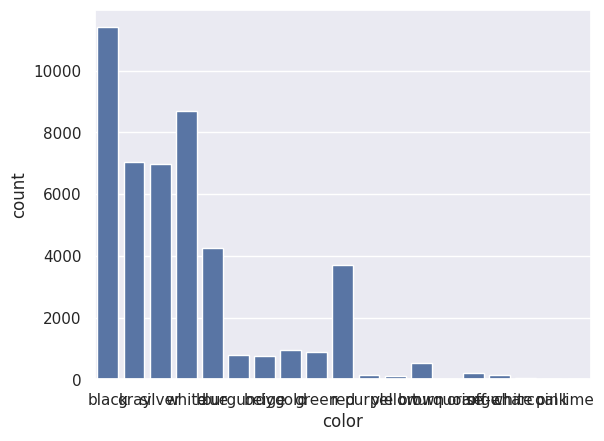

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)



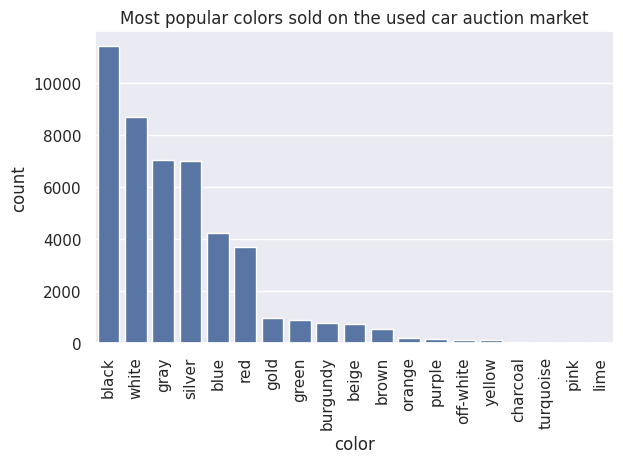

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

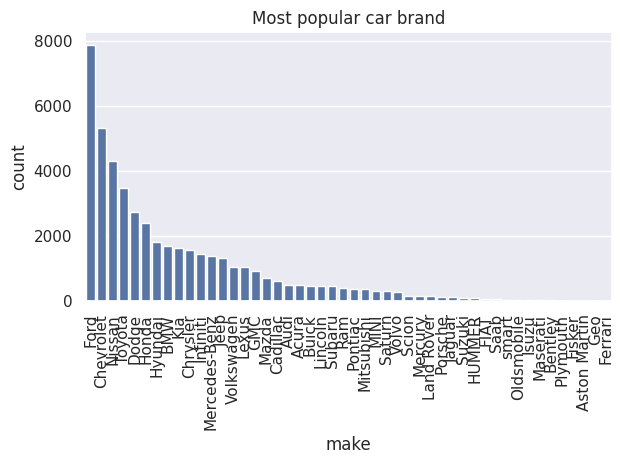

In [ ]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brand')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: The most popular car brands are Ford, Chevrolet and Nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

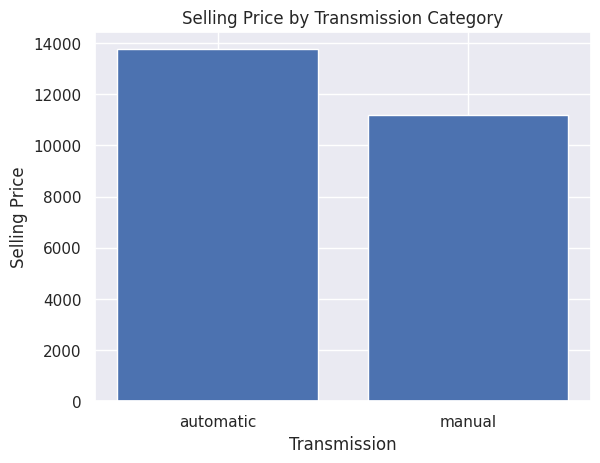

In [ ]:
## Group the data by 'transmission' and calculate the mean selling price for each group
mean_prices = df.groupby("transmission")["sellingprice"].mean().reset_index()

# Create a bar plot using the average selling prices for each transmission type
plt.bar(mean_prices['transmission'],mean_prices['sellingprice'])
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.title('Selling Price by Transmission Category')
plt.show()

**Answer for Q2**: Yes, automatic cars sell for higher prices than manual cars. As we can see in the bar plot, automatic cars sell for on average 14000, while manual cars sell for 11000.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

Text(110.99999999999999, 0.5, 'Selling Price')

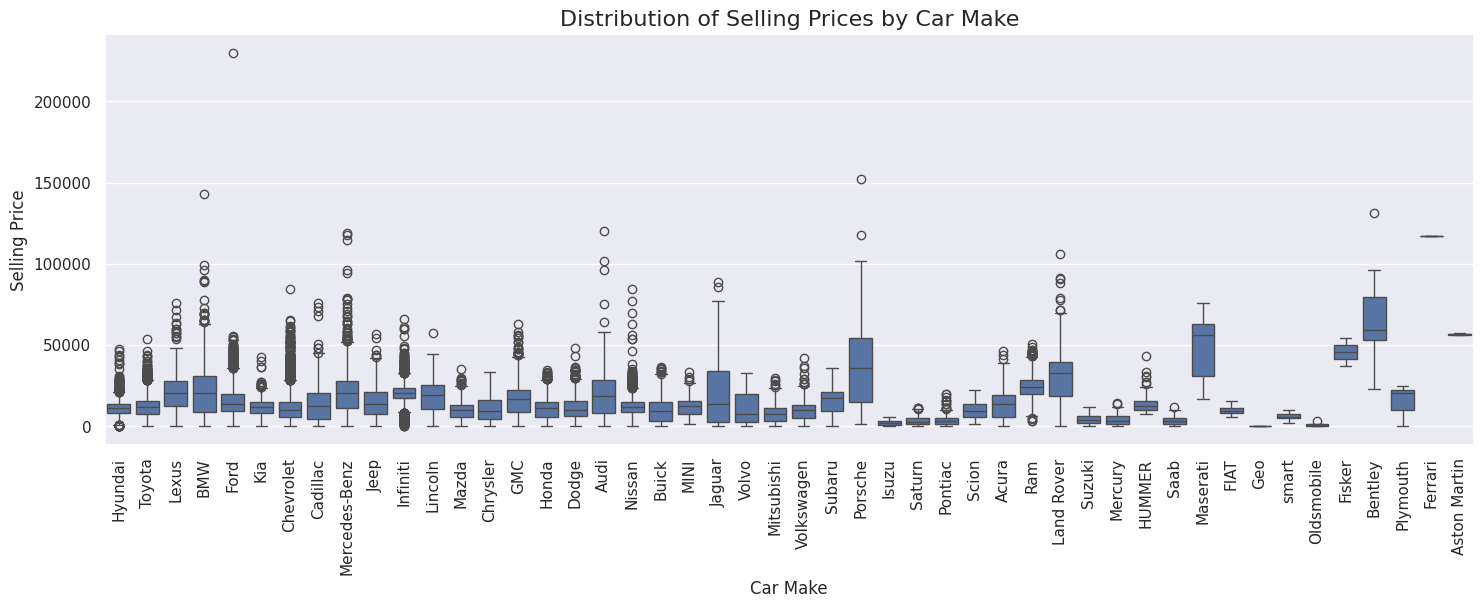

In [ ]:
#appear bigger
plt.figure(figsize=(15, 6))


#Create a box plot using Seaborn to visualize the distribution of selling prices for each car make, with 'make' on the x-axis and 'sellingprice' on the y-axis
sns.boxplot(df,x='make', y='sellingprice')

#Rotate the x-axis labels by 90 degrees to avoid overlapping labels and improve readability
plt.xticks(rotation=90)
#Adjust the layout of the plot to ensure everything is properly spaced and readable
plt.tight_layout()

# Add titles and labels
plt.title('Distribution of Selling Prices by Car Make', fontsize=16)
plt.xlabel('Car Make', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)



**Answer for Q3**: The cars with widest distribution are Jaguar and porsche beacause they have the longest whiskers relative to the width of their box.
The two car makes with highest prices are Ferrai and Bentley because  box plots positioned higher on the y-axis compared to others and their median line is also positioned higher, meaning their average (or median) selling prices are higher than other brands.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

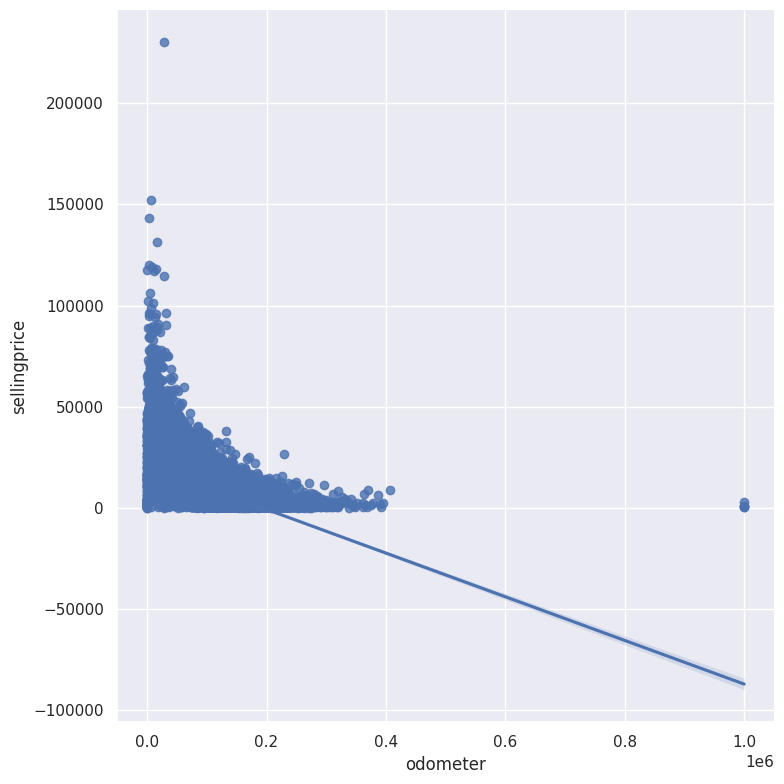

In [ ]:
sns.lmplot(x='odometer', y='sellingprice', data=df, palette='magma',  height=8);

**Answer for Q4**:  As we can see the line is sloping downwards which means that odometer and selling price are negatively correlated, as odometer mileage increases, sale price decreases. According to our observation, points are clustered around one end of the line, thus, the correlation is strong.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

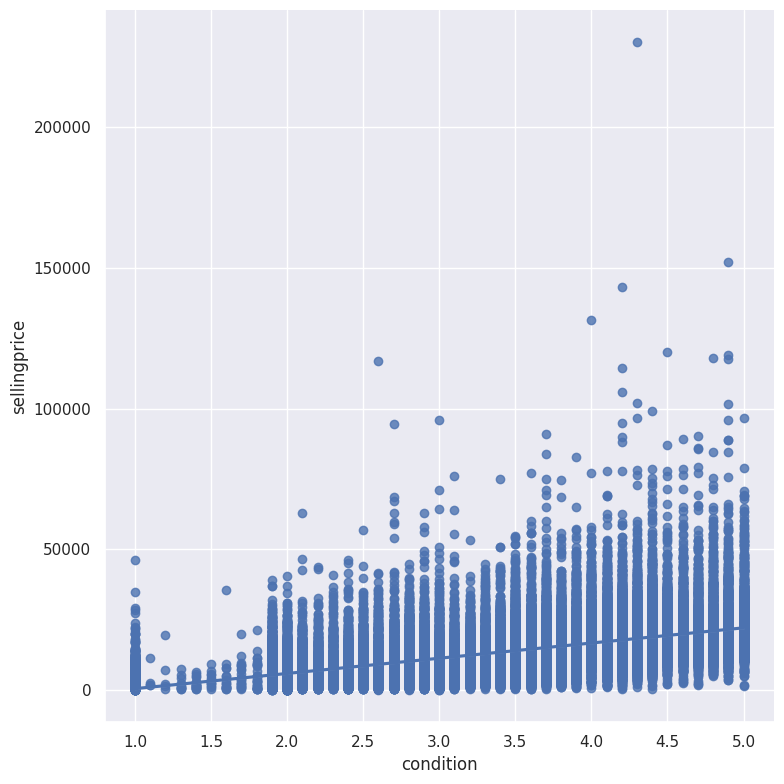

In [ ]:
sns.lmplot(x='condition', y='sellingprice', data=df, palette='magma',  height=8);

**Answer for Q5**: The correlation between the condition and selling price is positevely correlated because the line is sloping upward.We can observe that the points are clustered around each condition value and around the best fit line.This indicates a strong correlation.

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

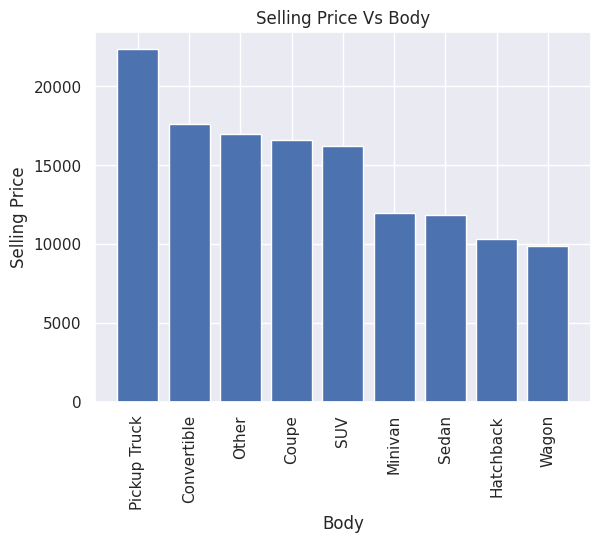

In [ ]:
# Group by 'body' column and calculate the mean selling price for each body type
mean_prices = df.groupby("body")["sellingprice"].mean().reset_index().sort_values(by="sellingprice", ascending=False)

# Create a bar plot to visualize the mean selling price for each body type
plt.bar(mean_prices['body'],mean_prices['sellingprice'])

# Set the label for the x-axis as 'Body'
plt.xlabel('Body')

# Set the label for the y-axis as 'Selling Price'
plt.ylabel('Selling Price')

# Add a title
plt.title('Selling Price Vs Body')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)


plt.show()

**Answer for Q6**: Yes, there are differences in the average mean of car prices due to its car body type. The most expensive car body type is pickup truck and the least expensive is the wagon

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

checking correlations between all columns and selling price  

In [ ]:
corr = df.corr(numeric_only=True)
corr
corr['sellingprice'].sort_values(ascending=False, key=lambda x: x.abs())


,sellingprice
sellingprice,1.000000
year,0.581164
odometer,-0.580900
condition,0.529141


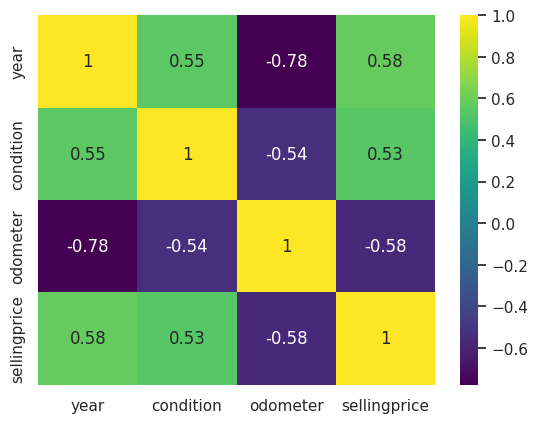

In [ ]:
sns.heatmap(corr, cmap='viridis', annot = True);

Label encoding here to check for correlation between the seller and the selling price and determine whether to remove the column.

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
test = ['seller']
df_enc = pd.get_dummies(data=df_copy,
                           columns=test,
                           drop_first=True, dtype='int8')

label_encoder = LabelEncoder()

df_copy['seller_encoded'] = label_encoder.fit_transform(df_copy['seller'])
df_enc.head()

correlation_coefficient = df_copy['seller_encoded'].corr(df_copy['sellingprice'])
correlation_coefficient

-0.020545942521714457

We think we need to drop:

1.VIN: since all of the values in the column are unique, as determined by the df.nunique() function, there is essentially no correlation with selling price, so putting it into the model consideration will not increase the accuracy.

2.Saledate: It makes sense that there would be no correlation between the car's selling price and the day it was sold.

3.Color/interior: Generally speaking, the car's price is not determined by the color or the interior, we know that yes maybe some colors are not liked by most people and people will not tend to buy cars with these colors but at the end
 these cars will still find buyers, even if it takes a bit more time to sell them.

 4.State: The dataset must be applicable to a wide range of markets, since the existence of states in a nation is not a common occurrence (for instance, Egypt does not have states). Furthermore, the car's selling price is generally not related to the specific state where it was auctioned.

 5.seller: We removed the column since it has little impact on price prediction because, when we observed the correlation coeffecient with the selling price, we find that it has a very weak correlation that is close to 0 (the value is -0.0123).


 Condition, Odemeter, Year, Model, and Trim are the most relevant columns that will enable us to make an accurate estimate of car prices, so we have decided to to keep them.
 Also based on the correlation matrix, we can see that the numbers doesn't indicte that there is an overfitting of data.
Year column are kept for the purpose of serving as a trend indicator for price fluctuations.
 Odometer, which is the distance the car has traveled, should logically have an impact on the selling price. It makes sense that the relation is negative, as the corr matrix illustrates.
 The "condition" is the same, but there is a positive correlation between the selling price and condition.





In [ ]:
# Define a list of columns to drop
columns_to_drop = [	'vin','color',	'interior',	'seller', 'saledate', 'state']

df_encode = df.copy()
# Use the drop method to remove the specified columns
df_encode = df_encode.drop(columns=columns_to_drop)

df_encode.head()

,year,make,model,trim,body,transmission,condition,odometer,sellingprice
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,3.9,50404.0,10900.0
1,2014,Toyota,4Runner,SR5,SUV,automatic,4.9,17846.0,29900.0
2,2012,Lexus,IS 250,Base,Sedan,automatic,4.1,21122.0,24200.0
3,2002,BMW,X5,4.4i,SUV,automatic,1.9,145303.0,3200.0
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,4.9,6714.0,22100.0


One-Hot Encoding is the appropriate approach to use in our case, since the categorical variables we have here are nominal.

In [ ]:
categorical_columns = ['model', 'make', 'transmission', 'body', 'trim']

# Perform one-hot encoding on the categorical columns
df_encode = pd.get_dummies(data=df_encode,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

# Print information about the original and encoded DataFrames
print('Columns in original data frame:\n', df.columns.values)
print('\nNumber of rows and columns in the original dataset:', df.shape)
print('\nColumns in the DataFrame after encoding dummy variables:\n', df_encode.columns.values)
print('\nNumber of rows and columns in the encoded dataset:', df_encode.shape)

# Display the first few rows of the encoded DataFrame
print(df_encode.head())

Columns in original data frame:
 ['year' 'make' 'model' 'trim' 'body' 'transmission' 'vin' 'state'
 'condition' 'odometer' 'color' 'interior' 'seller' 'sellingprice'
 'saledate']

Number of rows and columns in the original dataset: (46578, 15)

Columns in the DataFrame after encoding dummy variables:
 ['year' 'condition' 'odometer' ... 'trim_xDrive35i Premium'
 'trim_xDrive48i' 'trim_xDrive50i']

Number of rows and columns in the encoded dataset: (46578, 1803)
   year  condition  odometer  sellingprice  model_1500  model_190-Class  \
0  2013        3.9   50404.0       10900.0           0                0   
1  2014        4.9   17846.0       29900.0           0                0   
2  2012        4.1   21122.0       24200.0           0                0   
3  2002        1.9  145303.0        3200.0           0                0   
4  2014        4.9    6714.0       22100.0           0                0   

   model_2 Series  model_200  model_200SX  model_2500  ...  trim_sDrive35is  \
0    

In [ ]:
df_encode.head()

,year,condition,odometer,sellingprice,model_1500,model_190-Class,model_2 Series,model_200,model_200SX,model_2500,...,trim_sDrive35is,trim_t Turbo,trim_x,trim_xDrive28i,trim_xDrive30i,trim_xDrive35d,trim_xDrive35i,trim_xDrive35i Premium,trim_xDrive48i,trim_xDrive50i
0,2013,3.9,50404.0,10900.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,4.9,17846.0,29900.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,21122.0,24200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,145303.0,3200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714.0,22100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Normalizing using Min-Max Normalization for scaling the quantitative data to fall within a smaller, specified standardized range

We wanted to normalize the sellingprice but in the tutorial it is said that we shouldn't normalize the dependent variable

In [ ]:
#Normalization to set values within a smaller range

numerical_columns = ['condition', 'odometer']


df_encode[numerical_columns] = (

    df_encode[numerical_columns] - df_encode[numerical_columns].min()

) /(

    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)


df_encode.head()

,year,condition,odometer,sellingprice,model_1500,model_190-Class,model_2 Series,model_200,model_200SX,model_2500,...,trim_sDrive35is,trim_t Turbo,trim_x,trim_xDrive28i,trim_xDrive30i,trim_xDrive35d,trim_xDrive35i,trim_xDrive35i Premium,trim_xDrive48i,trim_xDrive50i
0,2013,0.725,0.050403,10900.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014,0.975,0.017845,29900.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,0.775,0.021121,24200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2002,0.225,0.145302,3200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,0.975,0.006713,22100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

x = df_encode.drop('sellingprice',axis=1) # Independent variable
y = df_encode['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


## Modelling

_Apply the linear regression model below._

In [ ]:
# linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);

In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-2.014683e+06
1,theta_1,year,1.013820e+03
2,theta_2,condition,5.107338e+03
3,theta_3,odometer,-4.438298e+04
4,theta_4,model_1500,2.539026e+01
...,...,...,...
1798,theta_1798,trim_xDrive35d,3.438315e+03
1799,theta_1799,trim_xDrive35i,6.256466e+03
1800,theta_1800,trim_xDrive35i Premium,5.596902e+03
1801,theta_1801,trim_xDrive48i,-1.325687e+03


## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [ ]:
y_pred = lin_reg.predict(x_test)

from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  3549.4314835517575
R^2 obtained is: 0.8636373836286247


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

The mean absolute percentage error (MAPE) is:  0.4832669944440506
The median absolute error (MAE) is:  1400.9096627414692


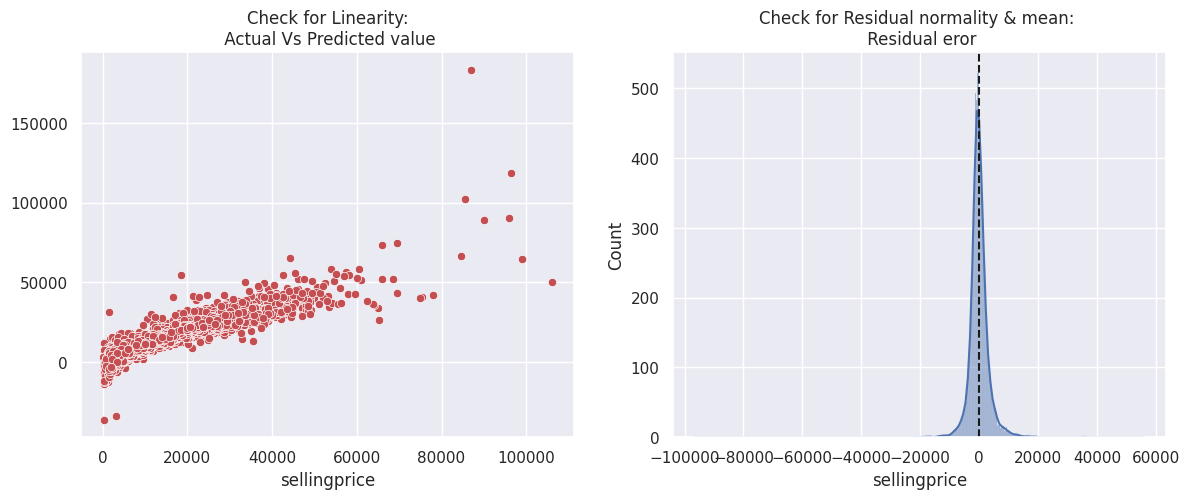

In [ ]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: In conclusion, the RMSE of 3549.43 indicates that, on average, the model's predictions deviate from the actual selling prices by approximately $3549.43.

The R² is 0.8636 which shows that around 86.36% of the variance in the target variable can be predicted from the features included in the model, according to an R2 value of 0.8636. So we can observe that the model detect a big amount of the data variability which is a good fit.


Furthermore, a MAPE value of 0.483 indicates that on average, the model's predictions deviate from the actual values by approximately 48.33%.
Additionally, MAE of 1400.91 This absolute error metric indicates that the model's predictions are, on average, off by about $1400.91 from the actual selling prices.

As previously explained, the model appears to perform well in predicting used car prices based on the evaluation metrics like low RMSE, high R2, moderate MAPE, and low MAE. I would suggest this model to a used car dealership that wants to obtain accurate estimates for used car prices. More importat attributes, such as the car's depreciation, its previous maintenance history, number of past owners, warranties,  number of accidents and many others that could be used as factors in determining the used car price, could be added to the models in order to boost and improve their performance.

Also, the decison of to use this model or not shouldn;t take only in consideration the performance but it should take into consideration the dealership's opinion because if the dealership wants a precise abd accurate  pricing predictions then selecting a model with a high accuracy becomes very important







# **Bonus: Removig Outliers**

*   The following part shows how we eliminated outliers from the condition and selling price. By plotting this graph, we can observe that the ranges decreased which shows that the outliers were eliminated.



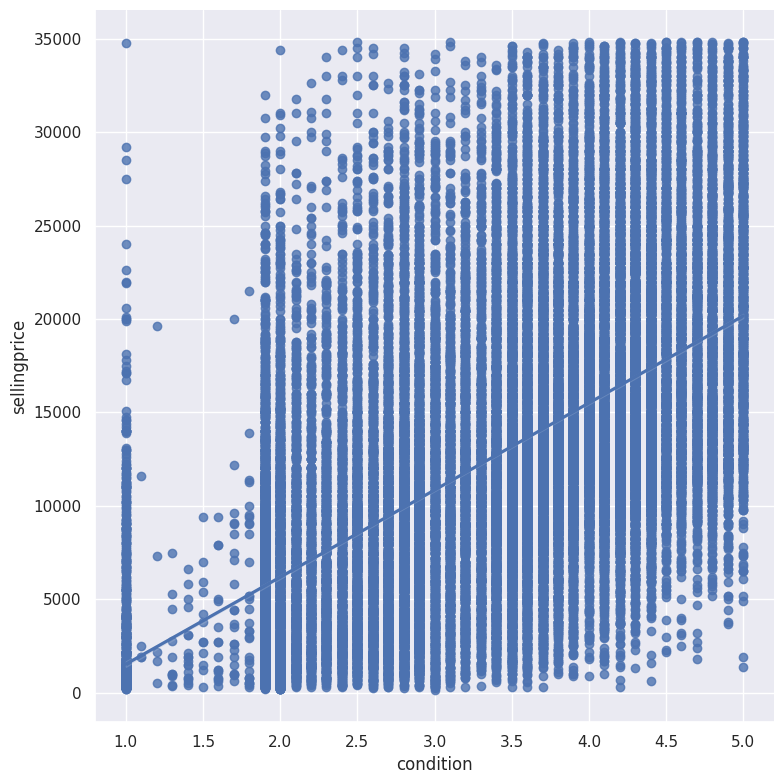

In [ ]:
# BONUS removing outliers
#The goal is to remove outliers from a dataset for two specific columns: condition and sellingprice
# Compute the Interquartile Range (IQR) for 'condition'.
Q1 = df['condition'].quantile(0.25)
Q3 = df['condition'].quantile(0.75)
IQR = Q3 - Q1
# The acceptable range is defined as (Q1 - 1.5 * IQR) to (Q3 + 1.5 * IQR), so now wi will Filter out outliers to include only the rows where 'condition' is in the acceptable range.
# This means values smaller than Q1 - 1.5 * IQR or larger than Q3 + 1.5 * IQR are removed.
df = df[(df['condition'] > Q1 - 1.5 * IQR) & (df['condition'] < Q3 + 1.5 * IQR)]

# we do the same steps for sellingprice condition
Q1 = df['sellingprice'].quantile(0.25)
Q3 = df['sellingprice'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['sellingprice'] > Q1 - 1.5 * IQR) & (df['sellingprice'] < Q3 + 1.5 * IQR)]

sns.lmplot(x='condition', y='sellingprice', data=df, palette='magma',  height=8);